In [25]:
import numpy as np
import pandas as pd
import csv
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.estimators import K2Score
import matplotlib.pyplot as plt
import networkx as nx

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.estimators import MaximumLikelihoodEstimator

In [30]:
import csv
import pandas as pd
labels_df = pd.read_csv("seen-dataset/dataset_seen_training_siamese.csv")
features_df = pd.read_csv("15features.csv")


# Generating data for training of the 31 nodes Bayesian model

In [59]:
columns = ['img1', 'img2','pen_pressure_img1', 'letter_spacing_img1', 'size_img1', 'dimension_img1', 'is_lowercase_img1', 'is_continuous_img1','slantness_img1', 'tilt_img1', 'entry_stroke_a_img1', 'staff_of_a_img1', 'formation_n_img1', 'staff_of_d_img1', 'exit_stroke_d_img1', 'word_formation_img1', 'constancy_img1', 'pen_pressure_img2', 'letter_spacing_img2', 'size_img2', 'dimension_img2', 'is_lowercase_img2', 'is_continuous_img2','slantness_img2', 'tilt_img2', 'entry_stroke_a_img2', 'staff_of_a_img2', 'formation_n_img2', 'staff_of_d_img2', 'exit_stroke_d_img2', 'word_formation_img2', 'constancy_img2', 'h']
final_df = pd.DataFrame(columns=columns)

res = labels_df.iloc[0:1000, :]
res = res.reset_index(drop=True)

for index,row in res.iterrows():
    left = pd.DataFrame()
    left = features_df[features_df.imagename == row.left]
    right = pd.DataFrame()
    right = features_df[features_df.imagename == row.right]
    if ((left.empty != True)):
         if ((right.empty != True)):
            final_df = final_df.append({'img1' : row.left  , 'img2' : row.right , 'pen_pressure_img1' : left.iloc[0,1], 'letter_spacing_img1': left.iloc[0,2], 'size_img1': left.iloc[0,3], 'dimension_img1': left.iloc[0,4], 'is_lowercase_img1': left.iloc[0,5], 'is_continuous_img1': left.iloc[0,6],'slantness_img1': left.iloc[0,7], 'tilt_img1': left.iloc[0,8], 'entry_stroke_a_img1': left.iloc[0,9], 'staff_of_a_img1': left.iloc[0,10], 'formation_n_img1': left.iloc[0,11], 'staff_of_d_img1': left.iloc[0,12], 'exit_stroke_d_img1': left.iloc[0,13], 'word_formation_img1': left.iloc[0,14], 'constancy_img1': left.iloc[0,15], 'pen_pressure_img2': right.iloc[0,1], 'letter_spacing_img2': right.iloc[0,2], 'size_img2': right.iloc[0,3], 'dimension_img2': right.iloc[0,4], 'is_lowercase_img2': right.iloc[0,5], 'is_continuous_img2': right.iloc[0,6],'slantness_img2': right.iloc[0,7], 'tilt_img2': right.iloc[0,8], 'entry_stroke_a_img2': right.iloc[0,9], 'staff_of_a_img2': right.iloc[0,10], 'formation_n_img2': right.iloc[0,11], 'staff_of_d_img2': right.iloc[0,12], 'exit_stroke_d_img2' : right.iloc[0,13], 'word_formation_img2': right.iloc[0,14], 'constancy_img2': right.iloc[0,15], 'h' : row.label} , ignore_index=True)

res = labels_df.iloc[60000:61000, :]
for index,row in res.iterrows():
    left = pd.DataFrame()
    left = features_df[features_df.imagename == row.left] 
    right = pd.DataFrame()
    right = features_df[features_df.imagename == row.right]
    if ((left.empty != True)):
         if ((right.empty != True)):
            final_df = final_df.append({'img1' : row.left  , 'img2' : row.right , 'pen_pressure_img1' : left.iloc[0,1], 'letter_spacing_img1': left.iloc[0,2], 'size_img1': left.iloc[0,3], 'dimension_img1': left.iloc[0,4], 'is_lowercase_img1': left.iloc[0,5], 'is_continuous_img1': left.iloc[0,6],'slantness_img1': left.iloc[0,7], 'tilt_img1': left.iloc[0,8], 'entry_stroke_a_img1': left.iloc[0,9], 'staff_of_a_img1': left.iloc[0,10], 'formation_n_img1': left.iloc[0,11], 'staff_of_d_img1': left.iloc[0,12], 'exit_stroke_d_img1': left.iloc[0,13], 'word_formation_img1': left.iloc[0,14], 'constancy_img1': left.iloc[0,15], 'pen_pressure_img2': right.iloc[0,1], 'letter_spacing_img2': right.iloc[0,2], 'size_img2': right.iloc[0,3], 'dimension_img2': right.iloc[0,4], 'is_lowercase_img2': right.iloc[0,5], 'is_continuous_img2': right.iloc[0,6],'slantness_img2': right.iloc[0,7], 'tilt_img2': right.iloc[0,8], 'entry_stroke_a_img2': right.iloc[0,9], 'staff_of_a_img2': right.iloc[0,10], 'formation_n_img2': right.iloc[0,11], 'staff_of_d_img2': right.iloc[0,12], 'exit_stroke_d_img2' : right.iloc[0,13], 'word_formation_img2': right.iloc[0,14], 'constancy_img2': right.iloc[0,15], 'h' : row.label} , ignore_index=True)
            
final_df
final_df.to_csv("finaltrainingcsv.csv", sep=',')
 

# Generating data for testing of the 31 nodes Bayesian model

In [60]:
columns = ['img1', 'img2','pen_pressure_img1', 'letter_spacing_img1', 'size_img1', 'dimension_img1', 'is_lowercase_img1', 'is_continuous_img1','slantness_img1', 'tilt_img1', 'entry_stroke_a_img1', 'staff_of_a_img1', 'formation_n_img1', 'staff_of_d_img1', 'exit_stroke_d_img1', 'word_formation_img1', 'constancy_img1', 'pen_pressure_img2', 'letter_spacing_img2', 'size_img2', 'dimension_img2', 'is_lowercase_img2', 'is_continuous_img2','slantness_img2', 'tilt_img2', 'entry_stroke_a_img2', 'staff_of_a_img2', 'formation_n_img2', 'staff_of_d_img2', 'exit_stroke_d_img2', 'word_formation_img2', 'constancy_img2', 'h']
final_test_df = pd.DataFrame(columns=columns)

res = labels_df.iloc[1000:2000, :]
res = res.reset_index(drop=True)

for index,row in res.iterrows():
    left = pd.DataFrame()
    left = features_df[features_df.imagename == row.left]
    right = pd.DataFrame()
    right = features_df[features_df.imagename == row.right]
    if ((left.empty != True)):
         if ((right.empty != True)):
            final_test_df = final_test_df.append({'img1' : row.left  , 'img2' : row.right , 'pen_pressure_img1' : left.iloc[0,1], 'letter_spacing_img1': left.iloc[0,2], 'size_img1': left.iloc[0,3], 'dimension_img1': left.iloc[0,4], 'is_lowercase_img1': left.iloc[0,5], 'is_continuous_img1': left.iloc[0,6],'slantness_img1': left.iloc[0,7], 'tilt_img1': left.iloc[0,8], 'entry_stroke_a_img1': left.iloc[0,9], 'staff_of_a_img1': left.iloc[0,10], 'formation_n_img1': left.iloc[0,11], 'staff_of_d_img1': left.iloc[0,12], 'exit_stroke_d_img1': left.iloc[0,13], 'word_formation_img1': left.iloc[0,14], 'constancy_img1': left.iloc[0,15], 'pen_pressure_img2': right.iloc[0,1], 'letter_spacing_img2': right.iloc[0,2], 'size_img2': right.iloc[0,3], 'dimension_img2': right.iloc[0,4], 'is_lowercase_img2': right.iloc[0,5], 'is_continuous_img2': right.iloc[0,6],'slantness_img2': right.iloc[0,7], 'tilt_img2': right.iloc[0,8], 'entry_stroke_a_img2': right.iloc[0,9], 'staff_of_a_img2': right.iloc[0,10], 'formation_n_img2': right.iloc[0,11], 'staff_of_d_img2': right.iloc[0,12], 'exit_stroke_d_img2' : right.iloc[0,13], 'word_formation_img2': right.iloc[0,14], 'constancy_img2': right.iloc[0,15], 'h' : row.label} , ignore_index=True)

res = labels_df.iloc[61000:62000, :]
for index,row in res.iterrows():
    left = pd.DataFrame()
    left = features_df[features_df.imagename == row.left]
    right = pd.DataFrame()
    right = features_df[features_df.imagename == row.right]
    if ((left.empty != True)):
         if ((right.empty != True)):
            final_test_df = final_test_df.append({'img1' : row.left  , 'img2' : row.right , 'pen_pressure_img1' : left.iloc[0,1], 'letter_spacing_img1': left.iloc[0,2], 'size_img1': left.iloc[0,3], 'dimension_img1': left.iloc[0,4], 'is_lowercase_img1': left.iloc[0,5], 'is_continuous_img1': left.iloc[0,6],'slantness_img1': left.iloc[0,7], 'tilt_img1': left.iloc[0,8], 'entry_stroke_a_img1': left.iloc[0,9], 'staff_of_a_img1': left.iloc[0,10], 'formation_n_img1': left.iloc[0,11], 'staff_of_d_img1': left.iloc[0,12], 'exit_stroke_d_img1': left.iloc[0,13], 'word_formation_img1': left.iloc[0,14], 'constancy_img1': left.iloc[0,15], 'pen_pressure_img2': right.iloc[0,1], 'letter_spacing_img2': right.iloc[0,2], 'size_img2': right.iloc[0,3], 'dimension_img2': right.iloc[0,4], 'is_lowercase_img2': right.iloc[0,5], 'is_continuous_img2': right.iloc[0,6],'slantness_img2': right.iloc[0,7], 'tilt_img2': right.iloc[0,8], 'entry_stroke_a_img2': right.iloc[0,9], 'staff_of_a_img2': right.iloc[0,10], 'formation_n_img2': right.iloc[0,11], 'staff_of_d_img2': right.iloc[0,12], 'exit_stroke_d_img2' : right.iloc[0,13], 'word_formation_img2': right.iloc[0,14], 'constancy_img2': right.iloc[0,15], 'h' : row.label} , ignore_index=True)
            
final_test_df
final_test_df.to_csv("finaltestingcsv.csv", sep=',')
 

# Creating a model for image 1

Time taken for hill climbing:  -1.811981201171875e-05


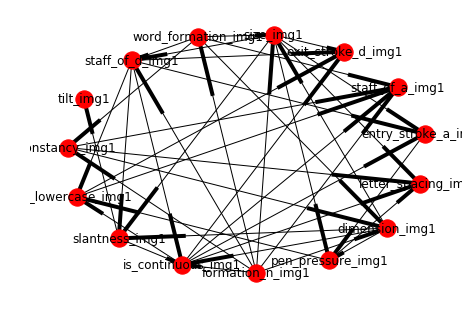

In [33]:
import time

import csv
import pandas as pd
labels_df = pd.read_csv("seen-dataset/dataset_seen_training_siamese.csv")
features_df = pd.read_csv("15features.csv")


#Getting the best Bayesian model using the hill climbing search
features_df = features_df.drop(['imagename'], axis=1)
# hc = HillClimbSearch(features_df, scoring_method=K2Score(features_df))
start = time.time()
# best_model = hc.estimate()
end = time.time()
print("Time taken for hill climbing: ",start-end)

# print(best_model.edges())
and_model1 = BayesianModel([('pen_pressure_img1', 'is_lowercase_img1'), ('pen_pressure_img1', 'letter_spacing_img1'), ('size_img1', 'slantness_img1'), ('size_img1', 'pen_pressure_img1'), ('size_img1', 'staff_of_d_img1'), ('size_img1', 'letter_spacing_img1'), ('size_img1', 'exit_stroke_d_img1'), ('size_img1', 'entry_stroke_a_img1'), ('dimension_img1', 'size_img1'), ('dimension_img1', 'is_continuous_img1'), ('dimension_img1', 'slantness_img1'), ('dimension_img1', 'pen_pressure_img1'), ('is_lowercase_img1', 'staff_of_a_img1'), ('is_lowercase_img1', 'exit_stroke_d_img1'), ('is_continuous_img1', 'exit_stroke_d_img1'), ('is_continuous_img1', 'letter_spacing_img1'), ('is_continuous_img1', 'entry_stroke_a_img1'), ('is_continuous_img1', 'staff_of_a_img1'), ('is_continuous_img1', 'is_lowercase_img1'), ('slantness_img1', 'is_continuous_img1'), ('slantness_img1', 'tilt_img1'), ('entry_stroke_a_img1', 'pen_pressure_img1'), ('formation_n_img1', 'constancy_img1'), ('formation_n_img1', 'word_formation_img1'), ('formation_n_img1', 'dimension_img1'), ('formation_n_img1', 'staff_of_d_img1'), ('formation_n_img1', 'is_continuous_img1'), ('formation_n_img1', 'size_img1'), ('formation_n_img1', 'staff_of_a_img1'), ('staff_of_d_img1', 'is_continuous_img1'), ('staff_of_d_img1', 'exit_stroke_d_img1'), ('staff_of_d_img1', 'is_lowercase_img1'), ('staff_of_d_img1', 'slantness_img1'), ('staff_of_d_img1', 'entry_stroke_a_img1'), ('word_formation_img1', 'dimension_img1'), ('word_formation_img1', 'staff_of_a_img1'), ('word_formation_img1', 'size_img1'), ('word_formation_img1', 'staff_of_d_img1'), ('word_formation_img1', 'constancy_img1'), ('constancy_img1', 'staff_of_a_img1'), ('constancy_img1', 'letter_spacing_img1'), ('constancy_img1', 'dimension_img1')])
nx.draw(and_model1, with_labels=True)


# #Generating the CPDs
# cpds = MaximumLikelihoodEstimator(and_model, features_df)
# print("\n\nCPD table for f1: \n", cpds.estimate_cpd('f1'))

# Creating a similar model for image 2

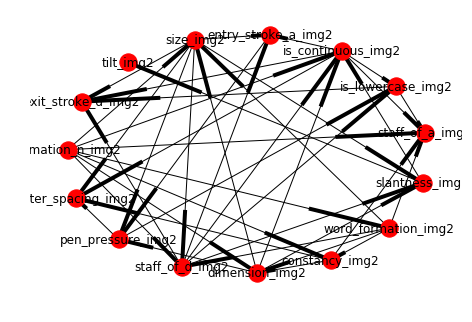

In [39]:
and_model2 = BayesianModel([('pen_pressure_img2', 'is_lowercase_img2'), ('pen_pressure_img2', 'letter_spacing_img2'), ('size_img2', 'slantness_img2'), ('size_img2', 'pen_pressure_img2'), ('size_img2', 'staff_of_d_img2'), ('size_img2', 'letter_spacing_img2'), ('size_img2', 'exit_stroke_d_img2'), ('size_img2', 'entry_stroke_a_img2'), ('dimension_img2', 'size_img2'), ('dimension_img2', 'is_continuous_img2'), ('dimension_img2', 'slantness_img2'), ('dimension_img2', 'pen_pressure_img2'), ('is_lowercase_img2', 'staff_of_a_img2'), ('is_lowercase_img2', 'exit_stroke_d_img2'), ('is_continuous_img2', 'exit_stroke_d_img2'), ('is_continuous_img2', 'letter_spacing_img2'), ('is_continuous_img2', 'entry_stroke_a_img2'), ('is_continuous_img2', 'staff_of_a_img2'), ('is_continuous_img2', 'is_lowercase_img2'), ('slantness_img2', 'is_continuous_img2'), ('slantness_img2', 'tilt_img2'), ('entry_stroke_a_img2', 'pen_pressure_img2'), ('formation_n_img2', 'constancy_img2'), ('formation_n_img2', 'word_formation_img2'), ('formation_n_img2', 'dimension_img2'), ('formation_n_img2', 'staff_of_d_img2'), ('formation_n_img2', 'is_continuous_img2'), ('formation_n_img2', 'size_img2'), ('formation_n_img2', 'staff_of_a_img2'), ('staff_of_d_img2', 'is_continuous_img2'), ('staff_of_d_img2', 'exit_stroke_d_img2'), ('staff_of_d_img2', 'is_lowercase_img2'), ('staff_of_d_img2', 'slantness_img2'), ('staff_of_d_img2', 'entry_stroke_a_img2'), ('word_formation_img2', 'dimension_img2'), ('word_formation_img2', 'staff_of_a_img2'), ('word_formation_img2', 'size_img2'), ('word_formation_img2', 'staff_of_d_img2'), ('word_formation_img2', 'constancy_img2'), ('constancy_img2', 'staff_of_a_img2'), ('constancy_img2', 'letter_spacing_img2'), ('constancy_img2', 'dimension_img2')])
nx.draw(and_model2, with_labels=True)

# Merging both the models and adding a hyporhesis node

time taken:  0.3044590950012207
['pen_pressure_img1', 'is_lowercase_img1', 'letter_spacing_img1', 'size_img1', 'slantness_img1', 'staff_of_d_img1', 'exit_stroke_d_img1', 'entry_stroke_a_img1', 'dimension_img1', 'is_continuous_img1', 'staff_of_a_img1', 'tilt_img1', 'formation_n_img1', 'constancy_img1', 'word_formation_img1', 'pen_pressure_img2', 'is_lowercase_img2', 'letter_spacing_img2', 'size_img2', 'slantness_img2', 'staff_of_d_img2', 'exit_stroke_d_img2', 'entry_stroke_a_img2', 'dimension_img2', 'is_continuous_img2', 'staff_of_a_img2', 'tilt_img2', 'formation_n_img2', 'constancy_img2', 'word_formation_img2', 'h']


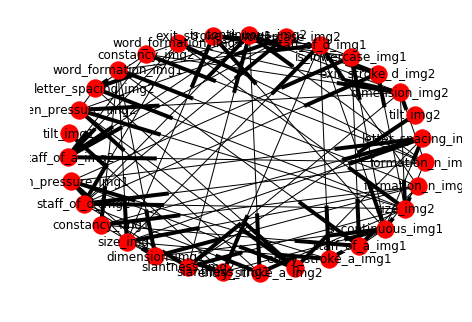

In [63]:
and_model3 = BayesianModel([('pen_pressure_img1', 'is_lowercase_img1'), ('pen_pressure_img1', 'letter_spacing_img1'), ('size_img1', 'slantness_img1'), ('size_img1', 'pen_pressure_img1'), ('size_img1', 'staff_of_d_img1'), ('size_img1', 'letter_spacing_img1'), ('size_img1', 'exit_stroke_d_img1'), ('size_img1', 'entry_stroke_a_img1'), ('dimension_img1', 'size_img1'), ('dimension_img1', 'is_continuous_img1'), ('dimension_img1', 'slantness_img1'), ('dimension_img1', 'pen_pressure_img1'), ('is_lowercase_img1', 'staff_of_a_img1'), ('is_lowercase_img1', 'exit_stroke_d_img1'), ('is_continuous_img1', 'exit_stroke_d_img1'), ('is_continuous_img1', 'letter_spacing_img1'), ('is_continuous_img1', 'entry_stroke_a_img1'), ('is_continuous_img1', 'staff_of_a_img1'), ('is_continuous_img1', 'is_lowercase_img1'), ('slantness_img1', 'is_continuous_img1'), ('slantness_img1', 'tilt_img1'), ('entry_stroke_a_img1', 'pen_pressure_img1'), ('formation_n_img1', 'constancy_img1'), ('formation_n_img1', 'word_formation_img1'), ('formation_n_img1', 'dimension_img1'), ('formation_n_img1', 'staff_of_d_img1'), ('formation_n_img1', 'is_continuous_img1'), ('formation_n_img1', 'size_img1'), ('formation_n_img1', 'staff_of_a_img1'), ('staff_of_d_img1', 'is_continuous_img1'), ('staff_of_d_img1', 'exit_stroke_d_img1'), ('staff_of_d_img1', 'is_lowercase_img1'), ('staff_of_d_img1', 'slantness_img1'), ('staff_of_d_img1', 'entry_stroke_a_img1'), ('word_formation_img1', 'dimension_img1'), ('word_formation_img1', 'staff_of_a_img1'), ('word_formation_img1', 'size_img1'), ('word_formation_img1', 'staff_of_d_img1'), ('word_formation_img1', 'constancy_img1'), ('constancy_img1', 'staff_of_a_img1'), ('constancy_img1', 'letter_spacing_img1'), ('constancy_img1', 'dimension_img1'), ('pen_pressure_img2', 'is_lowercase_img2'), ('pen_pressure_img2', 'letter_spacing_img2'), ('size_img2', 'slantness_img2'), ('size_img2', 'pen_pressure_img2'), ('size_img2', 'staff_of_d_img2'), ('size_img2', 'letter_spacing_img2'), ('size_img2', 'exit_stroke_d_img2'), ('size_img2', 'entry_stroke_a_img2'), ('dimension_img2', 'size_img2'), ('dimension_img2', 'is_continuous_img2'), ('dimension_img2', 'slantness_img2'), ('dimension_img2', 'pen_pressure_img2'), ('is_lowercase_img2', 'staff_of_a_img2'), ('is_lowercase_img2', 'exit_stroke_d_img2'), ('is_continuous_img2', 'exit_stroke_d_img2'), ('is_continuous_img2', 'letter_spacing_img2'), ('is_continuous_img2', 'entry_stroke_a_img2'), ('is_continuous_img2', 'staff_of_a_img2'), ('is_continuous_img2', 'is_lowercase_img2'), ('slantness_img2', 'is_continuous_img2'), ('slantness_img2', 'tilt_img2'), ('entry_stroke_a_img2', 'pen_pressure_img2'), ('formation_n_img2', 'constancy_img2'), ('formation_n_img2', 'word_formation_img2'), ('formation_n_img2', 'dimension_img2'), ('formation_n_img2', 'staff_of_d_img2'), ('formation_n_img2', 'is_continuous_img2'), ('formation_n_img2', 'size_img2'), ('formation_n_img2', 'staff_of_a_img2'), ('staff_of_d_img2', 'is_continuous_img2'), ('staff_of_d_img2', 'exit_stroke_d_img2'), ('staff_of_d_img2', 'is_lowercase_img2'), ('staff_of_d_img2', 'slantness_img2'), ('staff_of_d_img2', 'entry_stroke_a_img2'), ('word_formation_img2', 'dimension_img2'), ('word_formation_img2', 'staff_of_a_img2'), ('word_formation_img2', 'size_img2'), ('word_formation_img2', 'staff_of_d_img2'), ('word_formation_img2', 'constancy_img2'), ('constancy_img2', 'staff_of_a_img2'), ('constancy_img2', 'letter_spacing_img2'), ('constancy_img2', 'dimension_img2')])
and_model3.add_node('h')
and_model3.add_edges_from([('pen_pressure_img1', 'h'), ('pen_pressure_img2', 'h') ,('letter_spacing_img1','h') ,('letter_spacing_img2', 'h')])
nx.draw(and_model3, with_labels=True)

combined_features = pd.read_csv("finaltrainingcsv.csv")
combined_features = combined_features.drop('img1',1)
combined_features = combined_features.drop('img2',1)
combined_features = combined_features.drop('Unnamed: 0',1)
# combined_features

#Generating the CPDs
# mle = MaximumLikelihoodEstimator(and_model3, combined_features)
start = time.time()
and_model3.fit(combined_features, estimator=MaximumLikelihoodEstimator)
end = time.time()
print("time taken: " , end -start)

print(and_model3.nodes())


# Inference and accuracy

In [67]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(and_model3)

combined_features_test = pd.read_csv("finaltestingcsv.csv")
combined_features_test = combined_features_test.drop('img1',1)
combined_features_test = combined_features_test.drop('img2',1)
combined_features_test = combined_features_test.drop('Unnamed: 0',1)

i=0
counter=0
combined_features_test = combined_features_test.sample(frac=1).reset_index(drop=True) #for shuffling  the rows of the dataframe

start = time.time()
for index,row in combined_features_test.iterrows():
    print(i,"\n","actual h :", row['h']) 
    mle1 = infer.map_query(variables={'h'}, 
                           evidence = {'pen_pressure_img1' : row['pen_pressure_img1'] - 1, 'letter_spacing_img1': row['letter_spacing_img1'] - 1, 'size_img1': row['size_img1'] - 1, 'slantness_img1': row['slantness_img1'] - 1, 'staff_of_d_img1': row['staff_of_d_img1'] - 1, 'exit_stroke_d_img1': row['exit_stroke_d_img1'] - 1, 'entry_stroke_a_img1': row['entry_stroke_a_img1'] - 1, 'dimension_img1': row['dimension_img1'] - 1, 'is_continuous_img1': row['is_continuous_img1'] - 1, 'staff_of_a_img1': row['staff_of_a_img1'] - 1, 'tilt_img1': row['tilt_img1'] - 1, 'formation_n_img1': row['formation_n_img1'] - 1, 'constancy_img1': row['constancy_img1'] - 1, 'word_formation_img1': row['word_formation_img1'] - 1, 'pen_pressure_img2': row['pen_pressure_img2'] - 1, 'is_lowercase_img2': row['is_lowercase_img2'] - 1, 'letter_spacing_img2': row['letter_spacing_img2'] - 1, 'size_img2': row['size_img2'] - 1, 'slantness_img2': row['slantness_img2'] - 1, 'staff_of_d_img2': row['staff_of_d_img2'] - 1, 'exit_stroke_d_img2': row['exit_stroke_d_img2'] - 1, 'entry_stroke_a_img2': row['entry_stroke_a_img2'] - 1, 'dimension_img2': row['dimension_img2'] - 1, 'is_continuous_img2': row['is_continuous_img2'] - 1, 'staff_of_a_img2' : row['staff_of_a_img2'] - 1, 'tilt_img2': row['tilt_img2'] - 1, 'formation_n_img2': row['formation_n_img2'] - 1, 'constancy_img2': row['constancy_img2'] - 1, 'word_formation_img2': row['word_formation_img2'] - 1})
                           #evidence will be the values of all 30 features
    print(mle1) #predicted h
    if(mle1['h']==row['h']): #if actual=predicted
        counter+=1
    i +=1

end = time.time()
print("time taken for",i, "inferences :", end - start)
print("Correct predictions : ", counter , " out of ", i)
print("accuracy:", (counter/i)*100, "%")




0 
 actual h : 0
{'h': 0}
1 
 actual h : 0
{'h': 0}
2 
 actual h : 1
{'h': 1}
3 
 actual h : 0
{'h': 0}
4 
 actual h : 0
{'h': 0}
5 
 actual h : 0
{'h': 0}
6 
 actual h : 0
{'h': 0}
7 
 actual h : 0
{'h': 0}
8 
 actual h : 1
{'h': 1}
9 
 actual h : 1
{'h': 0}
10 
 actual h : 1
{'h': 1}
11 
 actual h : 0
{'h': 0}
12 
 actual h : 1
{'h': 1}
13 
 actual h : 1
{'h': 1}
14 
 actual h : 1
{'h': 1}
15 
 actual h : 0
{'h': 0}
16 
 actual h : 0
{'h': 0}
17 
 actual h : 0
{'h': 0}
18 
 actual h : 0
{'h': 0}
19 
 actual h : 1
{'h': 1}
20 
 actual h : 1
{'h': 1}
21 
 actual h : 1
{'h': 1}
22 
 actual h : 1
{'h': 1}
23 
 actual h : 1
{'h': 1}
24 
 actual h : 0
{'h': 0}
25 
 actual h : 1
{'h': 1}
26 
 actual h : 1
{'h': 1}
27 
 actual h : 0
{'h': 0}
28 
 actual h : 0
{'h': 0}
29 
 actual h : 0
{'h': 0}
30 
 actual h : 1
{'h': 1}
31 
 actual h : 1
{'h': 1}
32 
 actual h : 1
{'h': 0}
33 
 actual h : 0
{'h': 0}
34 
 actual h : 1
{'h': 0}
35 
 actual h : 1
{'h': 1}
36 
 actual h : 0
{'h': 0}
37 
 actual

{'h': 0}
297 
 actual h : 0
{'h': 0}
298 
 actual h : 1
{'h': 1}
299 
 actual h : 0
{'h': 0}
300 
 actual h : 1
{'h': 1}
301 
 actual h : 1
{'h': 1}
302 
 actual h : 1
{'h': 0}
303 
 actual h : 1
{'h': 1}
304 
 actual h : 1
{'h': 0}
305 
 actual h : 1
{'h': 1}
306 
 actual h : 0
{'h': 0}
307 
 actual h : 1
{'h': 1}
308 
 actual h : 1
{'h': 0}
309 
 actual h : 0
{'h': 0}
310 
 actual h : 0
{'h': 0}
311 
 actual h : 0
{'h': 0}
312 
 actual h : 1
{'h': 0}
313 
 actual h : 0
{'h': 0}
314 
 actual h : 1
{'h': 1}
315 
 actual h : 0
{'h': 0}
316 
 actual h : 0
{'h': 0}
317 
 actual h : 1
{'h': 1}
318 
 actual h : 0
{'h': 0}
319 
 actual h : 1
{'h': 1}
320 
 actual h : 0
{'h': 0}
321 
 actual h : 0
{'h': 0}
322 
 actual h : 1
{'h': 1}
323 
 actual h : 1
{'h': 1}
324 
 actual h : 1
{'h': 1}
325 
 actual h : 0
{'h': 0}
326 
 actual h : 1
{'h': 0}
327 
 actual h : 0
{'h': 0}
328 
 actual h : 1
{'h': 0}
329 
 actual h : 1
{'h': 1}
330 
 actual h : 1
{'h': 0}
331 
 actual h : 1
{'h': 0}
332 
 actua

{'h': 1}
590 
 actual h : 1
{'h': 0}
591 
 actual h : 1
{'h': 0}
592 
 actual h : 1
{'h': 1}
593 
 actual h : 1
{'h': 1}
594 
 actual h : 1
{'h': 0}
595 
 actual h : 0
{'h': 0}
596 
 actual h : 0
{'h': 0}
597 
 actual h : 0
{'h': 0}
598 
 actual h : 0
{'h': 0}
599 
 actual h : 1
{'h': 1}
600 
 actual h : 1
{'h': 1}
601 
 actual h : 1
{'h': 1}
602 
 actual h : 1
{'h': 1}
603 
 actual h : 0
{'h': 0}
604 
 actual h : 1
{'h': 1}
605 
 actual h : 1
{'h': 0}
606 
 actual h : 1
{'h': 1}
607 
 actual h : 0
{'h': 0}
608 
 actual h : 1
{'h': 0}
609 
 actual h : 1
{'h': 1}
610 
 actual h : 1
{'h': 1}
611 
 actual h : 0
{'h': 0}
612 
 actual h : 1
{'h': 1}
613 
 actual h : 1
{'h': 0}
614 
 actual h : 0
{'h': 0}
615 
 actual h : 1
{'h': 1}
616 
 actual h : 1
{'h': 0}
617 
 actual h : 1
{'h': 1}
618 
 actual h : 0
{'h': 0}
619 
 actual h : 1
{'h': 1}
620 
 actual h : 0
{'h': 0}
621 
 actual h : 0
{'h': 0}
622 
 actual h : 0
{'h': 0}
623 
 actual h : 1
{'h': 1}
624 
 actual h : 0
{'h': 0}
625 
 actua

{'h': 1}
885 
 actual h : 0
{'h': 0}
886 
 actual h : 0
{'h': 0}
887 
 actual h : 0
{'h': 0}
888 
 actual h : 0
{'h': 0}
889 
 actual h : 0
{'h': 0}
890 
 actual h : 1
{'h': 1}
891 
 actual h : 0
{'h': 0}
892 
 actual h : 0
{'h': 0}
893 
 actual h : 0
{'h': 0}
894 
 actual h : 0
{'h': 0}
895 
 actual h : 1
{'h': 0}
896 
 actual h : 0
{'h': 0}
897 
 actual h : 1
{'h': 1}
898 
 actual h : 0
{'h': 0}
899 
 actual h : 0
{'h': 0}
900 
 actual h : 0
{'h': 0}
901 
 actual h : 1
{'h': 1}
902 
 actual h : 1
{'h': 0}
903 
 actual h : 0
{'h': 0}
904 
 actual h : 1
{'h': 0}
905 
 actual h : 0
{'h': 0}
906 
 actual h : 0
{'h': 0}
907 
 actual h : 0
{'h': 0}
908 
 actual h : 0
{'h': 0}
909 
 actual h : 1
{'h': 1}
910 
 actual h : 1
{'h': 0}
911 
 actual h : 1
{'h': 1}
912 
 actual h : 1
{'h': 0}
913 
 actual h : 1
{'h': 1}
914 
 actual h : 1
{'h': 1}
915 
 actual h : 0
{'h': 0}
916 
 actual h : 1
{'h': 1}
917 
 actual h : 1
{'h': 1}
918 
 actual h : 1
{'h': 1}
919 
 actual h : 0
{'h': 0}
920 
 actua

{'h': 1}
1177 
 actual h : 1
{'h': 1}
1178 
 actual h : 1
{'h': 1}
1179 
 actual h : 1
{'h': 1}
1180 
 actual h : 1
{'h': 1}
1181 
 actual h : 1
{'h': 0}
1182 
 actual h : 0
{'h': 0}
1183 
 actual h : 1
{'h': 1}
1184 
 actual h : 0
{'h': 0}
1185 
 actual h : 1
{'h': 1}
1186 
 actual h : 1
{'h': 1}
1187 
 actual h : 0
{'h': 0}
1188 
 actual h : 0
{'h': 0}
1189 
 actual h : 1
{'h': 1}
1190 
 actual h : 1
{'h': 1}
1191 
 actual h : 1
{'h': 1}
1192 
 actual h : 0
{'h': 0}
1193 
 actual h : 0
{'h': 0}
1194 
 actual h : 0
{'h': 0}
1195 
 actual h : 1
{'h': 1}
1196 
 actual h : 0
{'h': 0}
1197 
 actual h : 0
{'h': 0}
1198 
 actual h : 1
{'h': 1}
1199 
 actual h : 1
{'h': 1}
1200 
 actual h : 0
{'h': 0}
1201 
 actual h : 1
{'h': 1}
1202 
 actual h : 1
{'h': 1}
1203 
 actual h : 1
{'h': 1}
1204 
 actual h : 1
{'h': 0}
1205 
 actual h : 1
{'h': 1}
1206 
 actual h : 1
{'h': 0}
1207 
 actual h : 1
{'h': 1}
1208 
 actual h : 0
{'h': 0}
1209 
 actual h : 1
{'h': 1}
1210 
 actual h : 1
{'h': 0}
1211 

{'h': 0}
1460 
 actual h : 1
{'h': 1}
1461 
 actual h : 0
{'h': 0}
1462 
 actual h : 1
{'h': 0}
1463 
 actual h : 0
{'h': 0}
1464 
 actual h : 1
{'h': 1}
1465 
 actual h : 1
{'h': 1}
1466 
 actual h : 1
{'h': 1}
1467 
 actual h : 0
{'h': 0}
1468 
 actual h : 0
{'h': 0}
1469 
 actual h : 1
{'h': 1}
1470 
 actual h : 0
{'h': 0}
1471 
 actual h : 1
{'h': 0}
1472 
 actual h : 0
{'h': 0}
1473 
 actual h : 1
{'h': 1}
1474 
 actual h : 1
{'h': 1}
1475 
 actual h : 1
{'h': 1}
1476 
 actual h : 1
{'h': 0}
1477 
 actual h : 1
{'h': 1}
1478 
 actual h : 0
{'h': 0}
1479 
 actual h : 0
{'h': 0}
1480 
 actual h : 1
{'h': 1}
1481 
 actual h : 1
{'h': 1}
1482 
 actual h : 0
{'h': 0}
1483 
 actual h : 1
{'h': 1}
1484 
 actual h : 0
{'h': 0}
1485 
 actual h : 1
{'h': 0}
1486 
 actual h : 0
{'h': 0}
1487 
 actual h : 1
{'h': 1}
1488 
 actual h : 1
{'h': 1}
1489 
 actual h : 0
{'h': 0}
1490 
 actual h : 0
{'h': 0}
1491 
 actual h : 1
{'h': 1}
1492 
 actual h : 0
{'h': 0}
1493 
 actual h : 1
{'h': 1}
1494 

{'h': 1}
1745 
 actual h : 1
{'h': 0}
1746 
 actual h : 0
{'h': 0}
1747 
 actual h : 0
{'h': 0}
1748 
 actual h : 1
{'h': 1}
1749 
 actual h : 1
{'h': 1}
1750 
 actual h : 0
{'h': 0}
1751 
 actual h : 0
{'h': 0}
1752 
 actual h : 0
{'h': 0}
1753 
 actual h : 0
{'h': 0}
1754 
 actual h : 0
{'h': 0}
1755 
 actual h : 1
{'h': 1}
1756 
 actual h : 1
{'h': 0}
1757 
 actual h : 0
{'h': 0}
1758 
 actual h : 1
{'h': 1}
1759 
 actual h : 0
{'h': 0}
1760 
 actual h : 0
{'h': 0}
1761 
 actual h : 1
{'h': 1}
1762 
 actual h : 0
{'h': 0}
1763 
 actual h : 1
{'h': 0}
1764 
 actual h : 0
{'h': 0}
1765 
 actual h : 1
{'h': 1}
1766 
 actual h : 0
{'h': 0}
1767 
 actual h : 1
{'h': 1}
1768 
 actual h : 1
{'h': 1}
1769 
 actual h : 1
{'h': 0}
1770 
 actual h : 1
{'h': 1}
1771 
 actual h : 1
{'h': 1}
1772 
 actual h : 0
{'h': 0}
1773 
 actual h : 1
{'h': 0}
1774 
 actual h : 0
{'h': 0}
1775 
 actual h : 0
{'h': 0}
1776 
 actual h : 0
{'h': 0}
1777 
 actual h : 1
{'h': 0}
1778 
 actual h : 1
{'h': 1}
1779 